<a href="https://colab.research.google.com/github/augustosz/Predicci-n-de-Diabetes/blob/main/Prediccion_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de Diabetes en Machine Lerning
**Se explora y visualiza los datos para posteriormente poder realizar predicciones de diabetes usando el el método de aprendizaje supervisado K-Nearest Neighbors (KNN)**

---



## Carga de Datos  
Aquí se carga los datos y se los transforma a DataFrame con Pandas.  

In [84]:
from google.colab import drive
import pandas as pd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# Montar Google Drive
drive.mount('/content/drive', force_remount=True)

# Ruta del archivo CSV en Google Drive
file_path = "/content/drive/My Drive/all_dataset/diabetes.csv"

Mounted at /content/drive


In [86]:
df = pd.read_csv(file_path)

## Análisis Exploratorio  
Se exploran los datos con `.info()`, `.describe()`, etc.  

In [87]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [88]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**revisamos si hay nulos en alguna columna**

In [90]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**datos duplicados**

In [91]:
df.duplicated().sum()

0

## Visualización  
Se grafican los datos con Matplotlib y Seaborn.

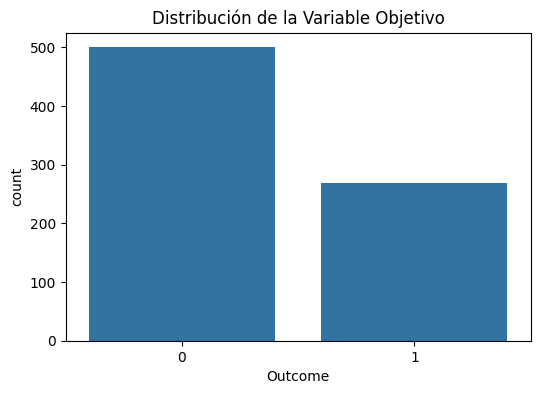

In [229]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Outcome", data=df)
plt.title("Distribución de la Variable Objetivo")
plt.show()

**Observando Valores Atípicos**

<Figure size 800x400 with 0 Axes>

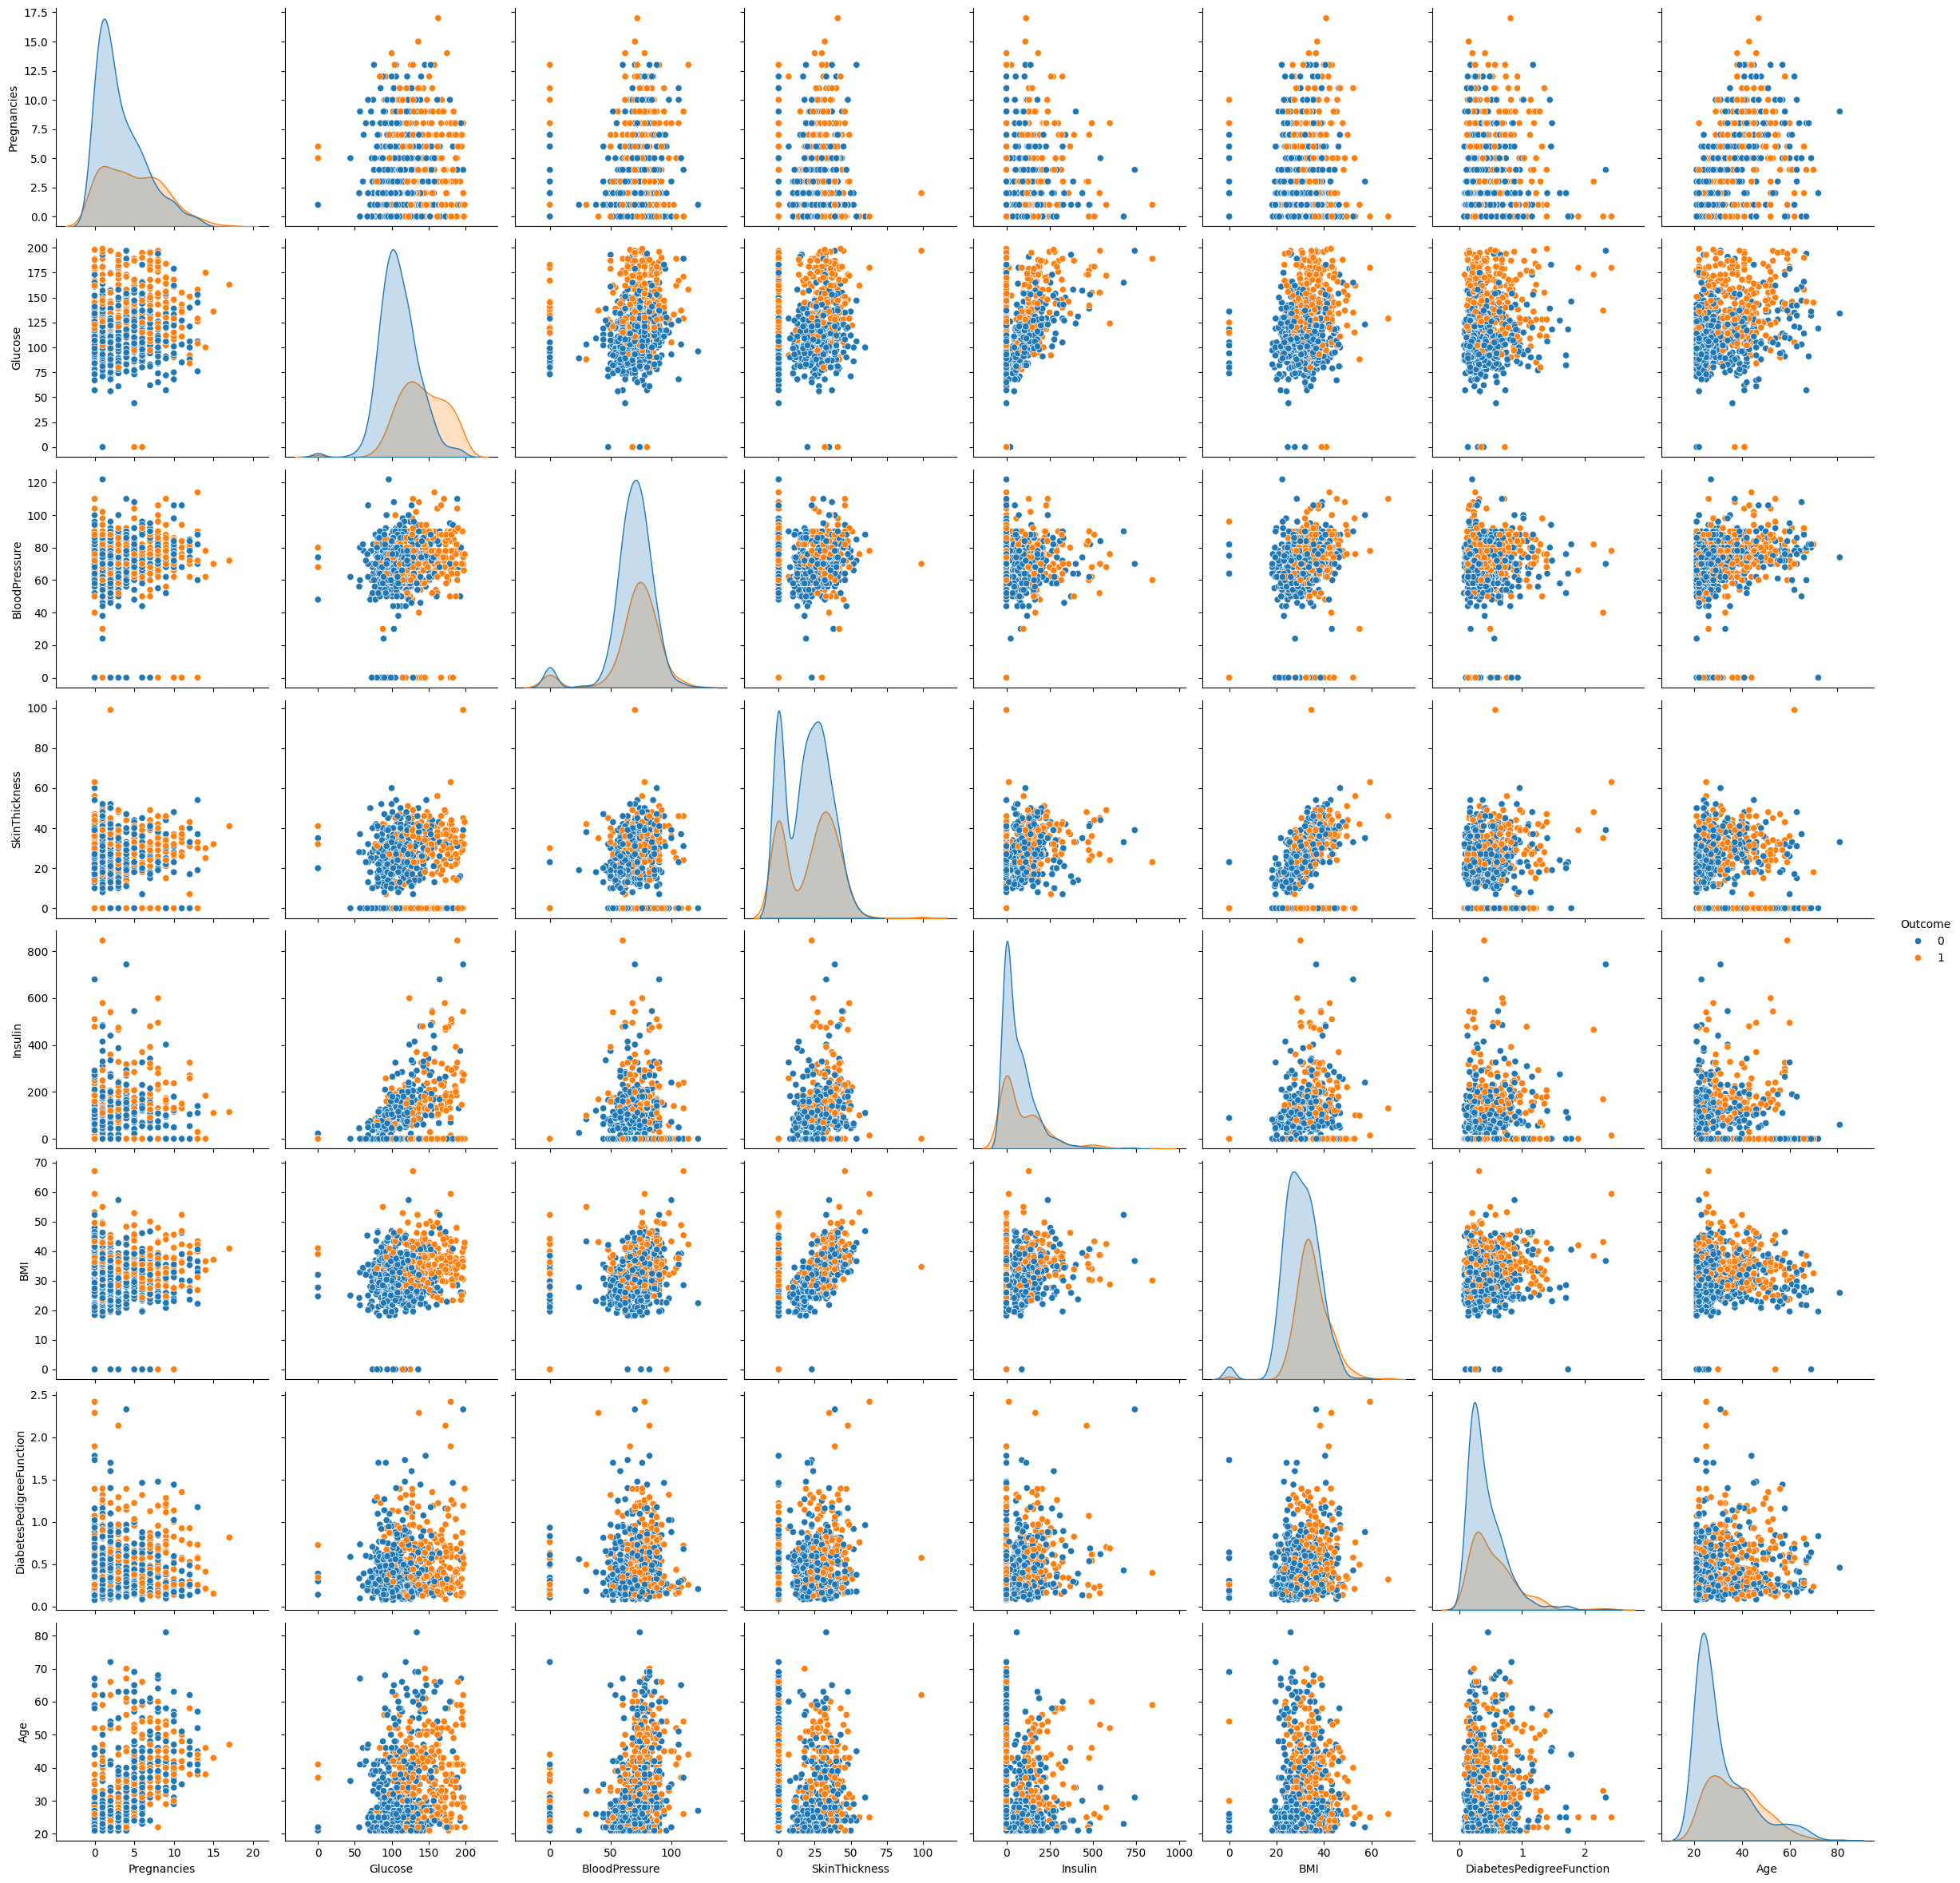

In [93]:
plt.figure(figsize=(8, 4))
sns.pairplot(df, hue='Outcome', height=3)
plt.show()

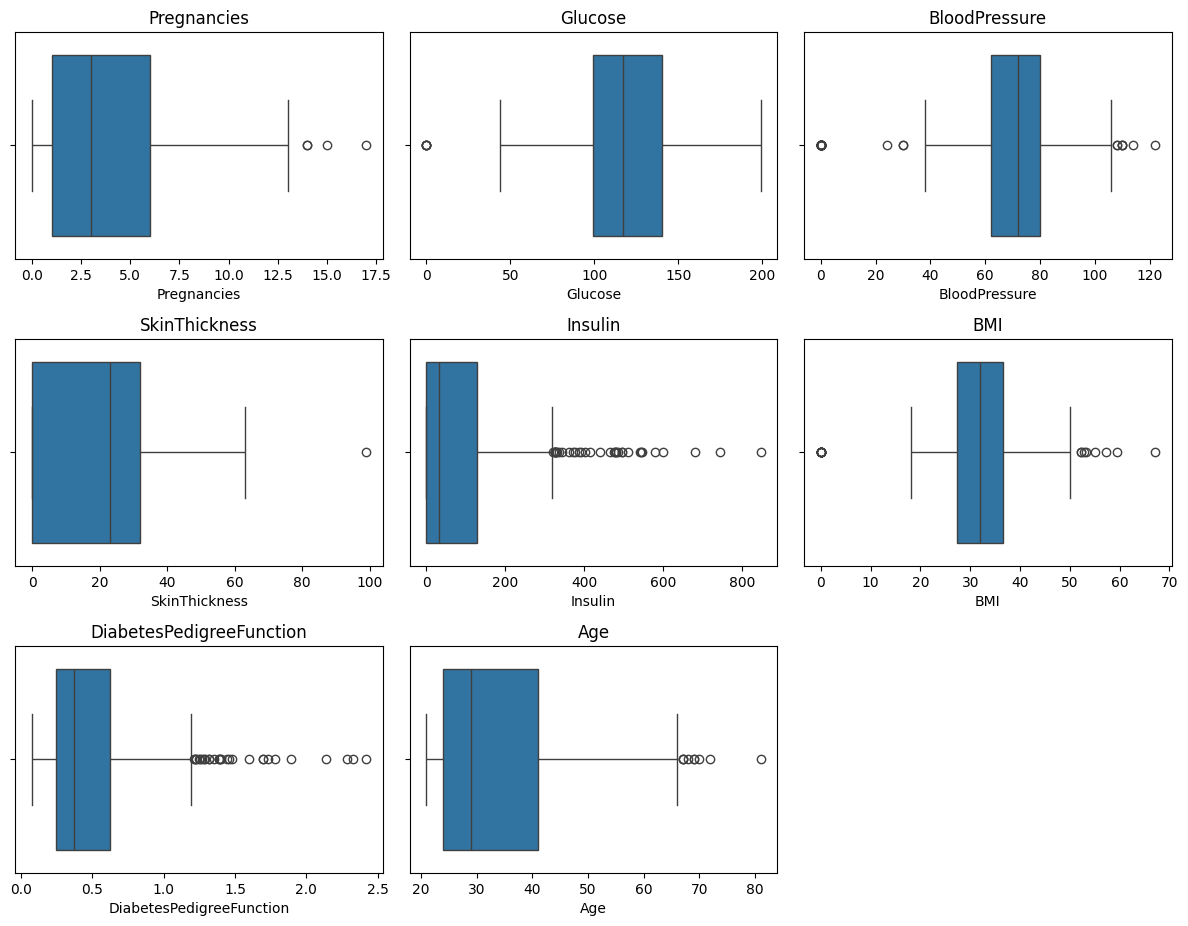

In [94]:
plt.figure(figsize=(12, 12))
for i, column in enumerate(df.columns[:-1], 1):
  plt.subplot(4, 3, i)
  sns.boxplot(x=df[column])
  plt.title(column)
plt.tight_layout()

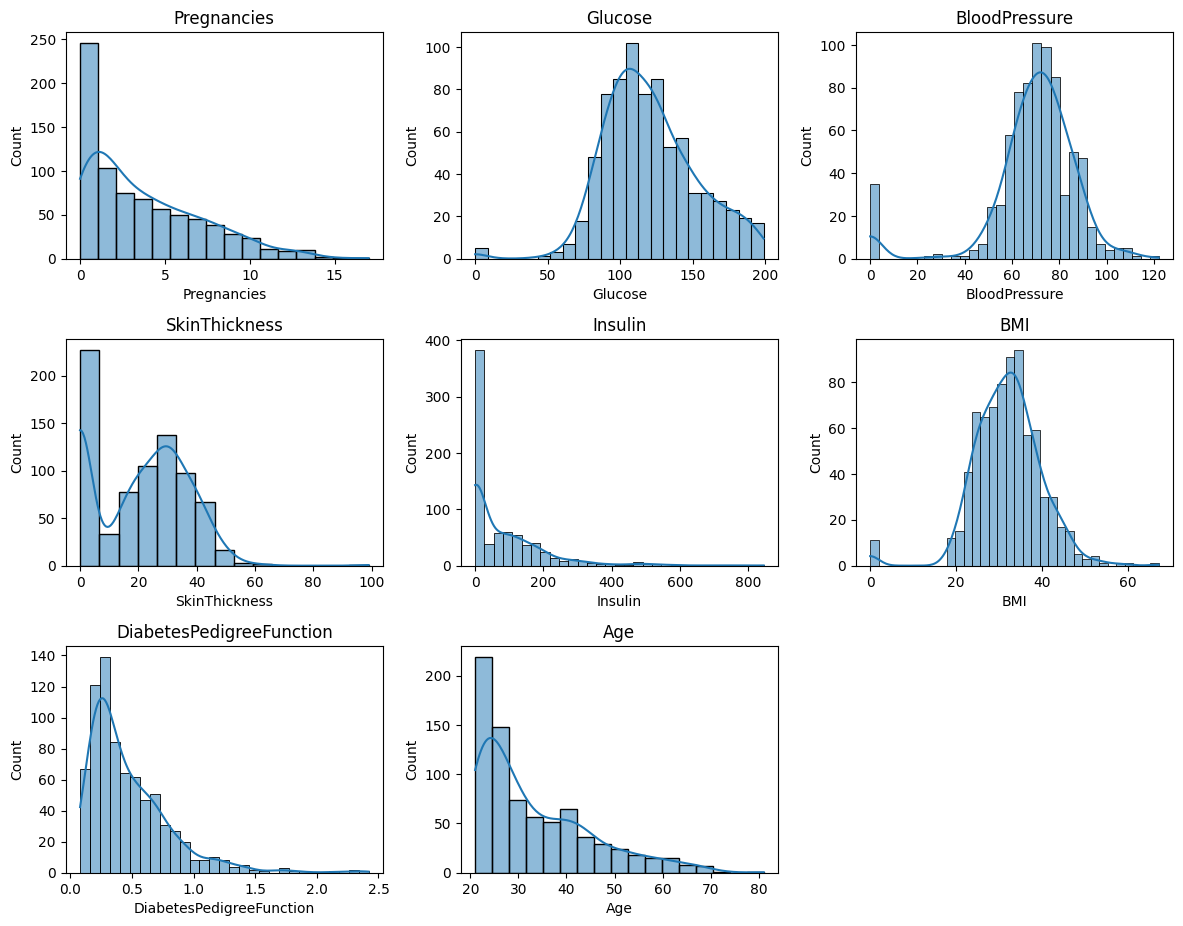

In [95]:
plt.figure(figsize=(12, 12))
for i, column in enumerate(df.columns[:-1], 1):
  plt.subplot(4,3, i)
  sns.histplot(df[column], kde=True)
  plt.title(column)
plt.tight_layout()

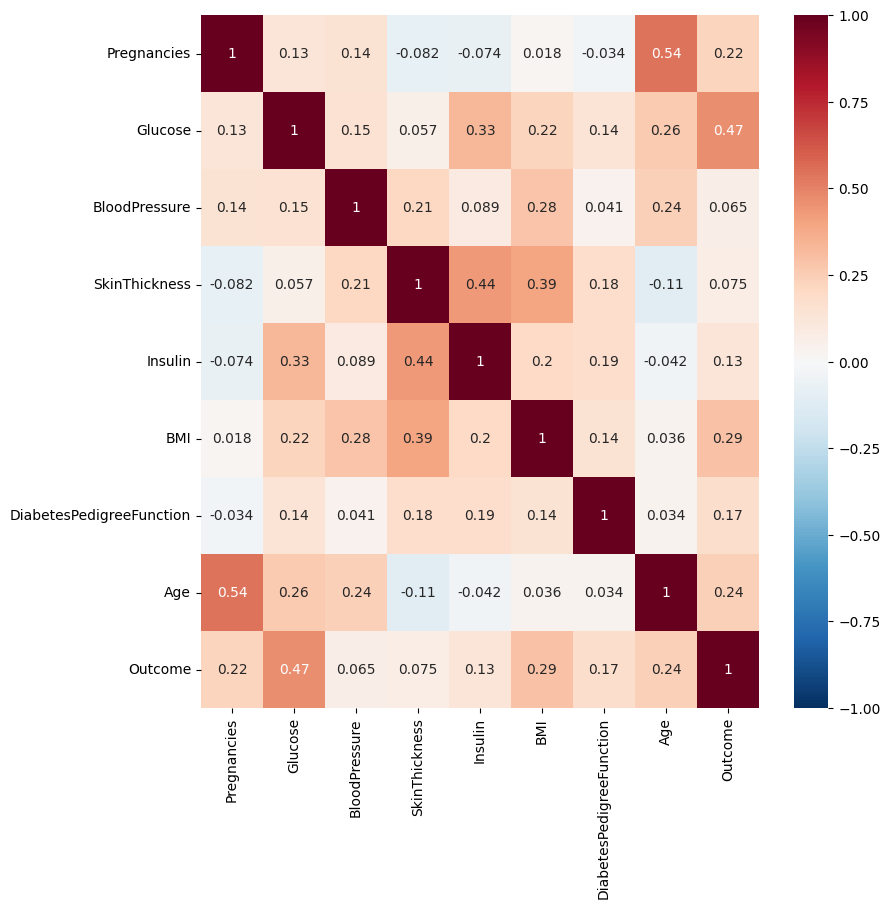

In [96]:
#resaltamos correlacines positivas ya las correlaciones negativas son muy leves
plt.figure(figsize=(9, 9))
sns.heatmap(df.corr(), vmin=-1, cmap='RdBu_r', annot=True)
plt.show()

## Escalado estandár y codificación de etiquetas

In [97]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(df.drop(["Outcome"], axis=1)),
                 columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThikness', 'insulin', 'bmi', 'DiabetesPedigreeFunction', 'Age'])

In [98]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThikness,insulin,bmi,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [99]:
y = df['Outcome']

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.3, random_state=0)

In [196]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []

for i in range(1, 18):
  knn = KNeighborsClassifier(i)
  knn.fit(X_train, y_train)
  train_scores.append(knn.score(X_train, y_train))
  test_scores.append(knn.score(X_test, y_test))


In [197]:
max_train_score = max(train_scores)
train_scores_index = [i for i, v in enumerate(train_scores) if v == max_train_score]
print("Max Train score {} % and k = {}".format(max_train_score*100, list(map(lambda x: x+1, train_scores_index))))

Max Train score 100.0 % and k = [1]


In [198]:
max_test_score = max(test_scores)
test_scores_index = [i for i, v in enumerate(test_scores) if v == max_test_score]
print("Max Train score {} % and k = {}".format(max_test_score*100, list(map(lambda x: x+1, test_scores_index))))

Max Train score 74.53531598513011 % and k = [13, 15]


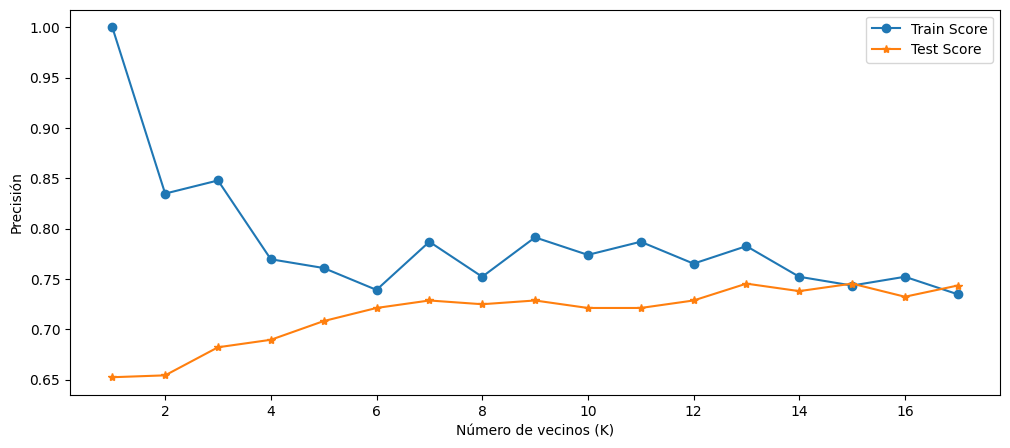

In [199]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, 18), train_scores, marker="o", label="Train Score")
plt.plot(range(1, 18), test_scores, marker="*", label="Test Score")
plt.xlabel('Número de vecinos (K)')
plt.ylabel('Precisión')
plt.legend()
plt.show()

In [226]:
knn = KNeighborsClassifier(15)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7453531598513011

In [227]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[310,  37],
       [100,  91]])

In [228]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       347
           1       0.71      0.48      0.57       191

    accuracy                           0.75       538
   macro avg       0.73      0.68      0.69       538
weighted avg       0.74      0.75      0.73       538

